# Задание 06. Статистические методы отбора признаков

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

## Задание 1: Отбор признаков с использованием корреляционных матриц.
   Для начала, используйте датасет о винах из sklearn.datasets. Найти корреляционную матрицу для датасета и, дополнительно, визуализируйте ее с помощью seaborn. 

Загружаем датасет

In [4]:
data = load_wine(as_frame=True).frame
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Строим матрицу корреляций

In [5]:
data.corr() < -0.7

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,False,False,False,False,False,False,False,False,False,False,False,False,False,False
malic_acid,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ash,False,False,False,False,False,False,False,False,False,False,False,False,False,False
alcalinity_of_ash,False,False,False,False,False,False,False,False,False,False,False,False,False,False
magnesium,False,False,False,False,False,False,False,False,False,False,False,False,False,False
total_phenols,False,False,False,False,False,False,False,False,False,False,False,False,False,True
flavanoids,False,False,False,False,False,False,False,False,False,False,False,False,False,True
nonflavanoid_phenols,False,False,False,False,False,False,False,False,False,False,False,False,False,False
proanthocyanins,False,False,False,False,False,False,False,False,False,False,False,False,False,False
color_intensity,False,False,False,False,False,False,False,False,False,False,False,False,False,False


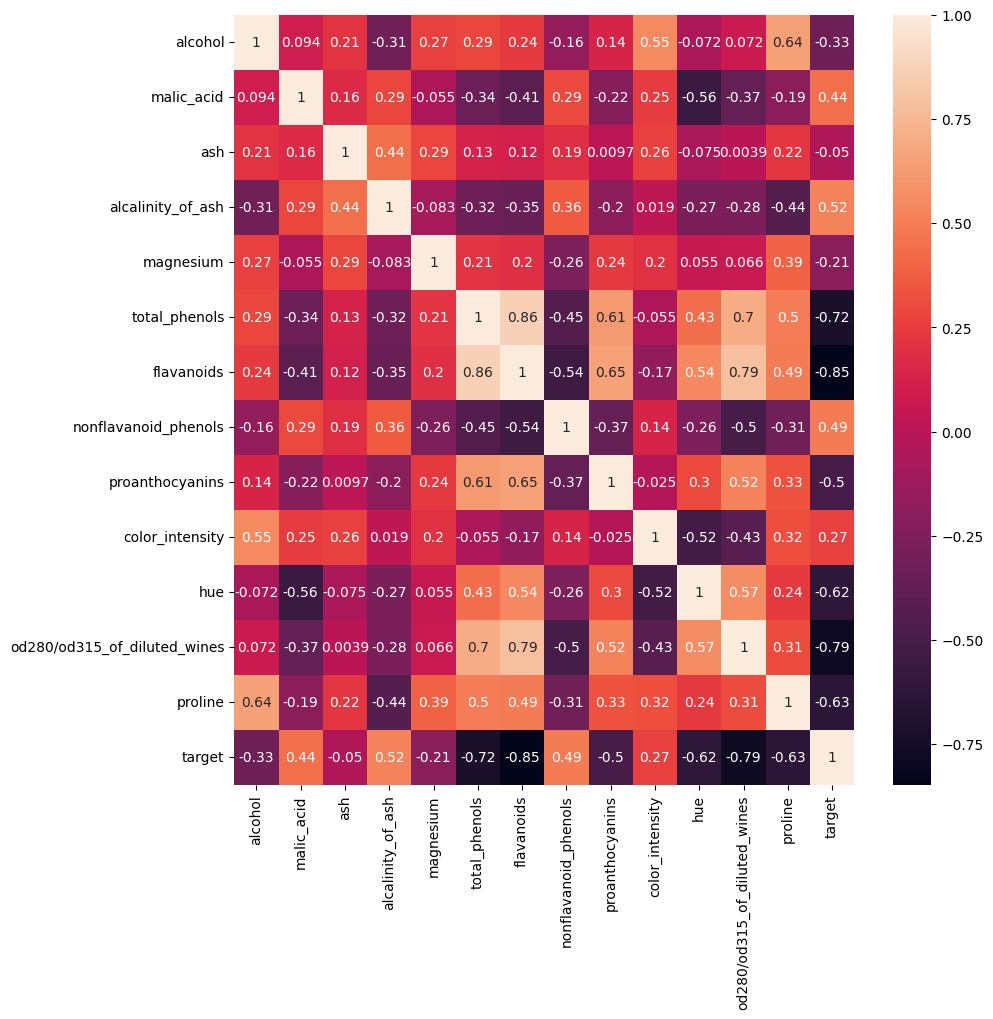

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Существует сильная положительная корреляция между flavanoids и total_phenol, od280/od315_of_diluted_wines

Существует сильная отрицательая корреляция между target и total_phenols, flavanoids, od280/od315_of_diluted_wines

## Задание 2: Отбор признаков на основе важности признаков в случайном лесе.
   Используйте тот же датасет и подгоните модель RandomForestRegressor к вашим данным, затем используйте атрибут feature_importances_ чтобы определить наиболее важные признаки.

Обучим модель на наших данных

In [7]:
from sklearn.ensemble import RandomForestRegressor


X, y = load_wine(as_frame=True).data, load_wine(as_frame=True).target
model = RandomForestRegressor(max_depth=10, random_state=42)
model.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=42)

Визуализируем важность признаков

Feature: alcohol, Score: 0.04847
Feature: malic_acid, Score: 0.00278
Feature: ash, Score: 0.00185
Feature: alcalinity_of_ash, Score: 0.00313
Feature: magnesium, Score: 0.00595
Feature: total_phenols, Score: 0.00081
Feature: flavanoids, Score: 0.46044
Feature: nonflavanoid_phenols, Score: 0.00011
Feature: proanthocyanins, Score: 0.00148
Feature: color_intensity, Score: 0.09577
Feature: hue, Score: 0.02198
Feature: od280/od315_of_diluted_wines, Score: 0.16387
Feature: proline, Score: 0.19337


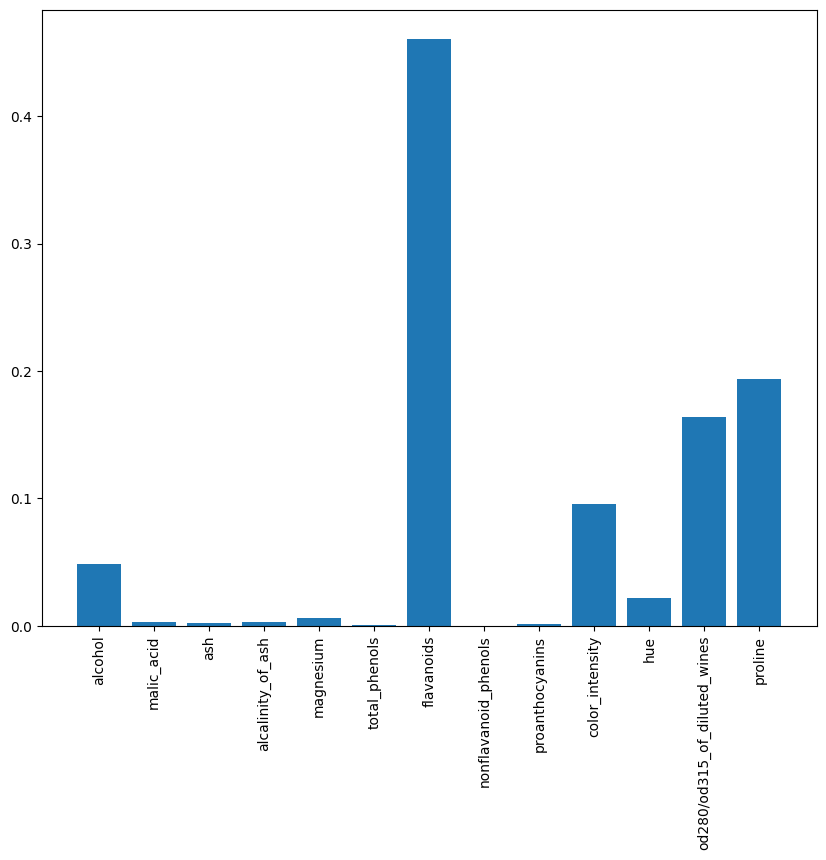

In [8]:
importance = model.feature_importances_

for i, score in zip(X.columns, importance):
    print(f'Feature: {i}, Score: {score:.5f}')

plt.figure(figsize=(10, 8))
plt.bar([x for x in X.columns], importance)
plt.xticks(rotation=90)
plt.show()

Наиболее важным признаками для модели оказались flavanoids, proline, od280/od315_of_diluted_wines.

## Задание 3: Использование выбора признаков на основе p-value.
   Для этого задания можно использовать набор данных Boston Housing из sklearn.datasets.

In [9]:
from sklearn.feature_selection import f_regression
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

С помощью модели линейной регрессии определим статистическую значимость признаков через значимость коэффициентов регрессии.

In [11]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

p_values = model.pvalues
ols_features = p_values[p_values < 0.05].index

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          6.72e-135
Time:                        17:10:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Таким образом, проверяя нулевую гипотезу о равенстве нулю коэффициентов, мы можем заключить, что признаки INDUS и AGE не являются статистически значимыми, следовательно, их можно исключить из модели.

## Задание 4: Отбор признаков с помощь метода взаимной информации.
Используйте любой датасет, с которым вам приятно работать. Установите библиотеку sklearn и примените функцию mutual_info_classif или mutual_info_regression для отбора признаков

In [12]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X, y)

mig_features = X.columns[mutual_info > 0.05]

Feature: const, Score: 0.00000
Feature: CRIM, Score: 0.34036
Feature: ZN, Score: 0.18161
Feature: INDUS, Score: 0.45830
Feature: CHAS, Score: 0.02227
Feature: NOX, Score: 0.45727
Feature: RM, Score: 0.52877
Feature: AGE, Score: 0.31395
Feature: DIS, Score: 0.29859
Feature: RAD, Score: 0.22360
Feature: TAX, Score: 0.36876
Feature: PTRATIO, Score: 0.42680
Feature: B, Score: 0.17470
Feature: LSTAT, Score: 0.66942


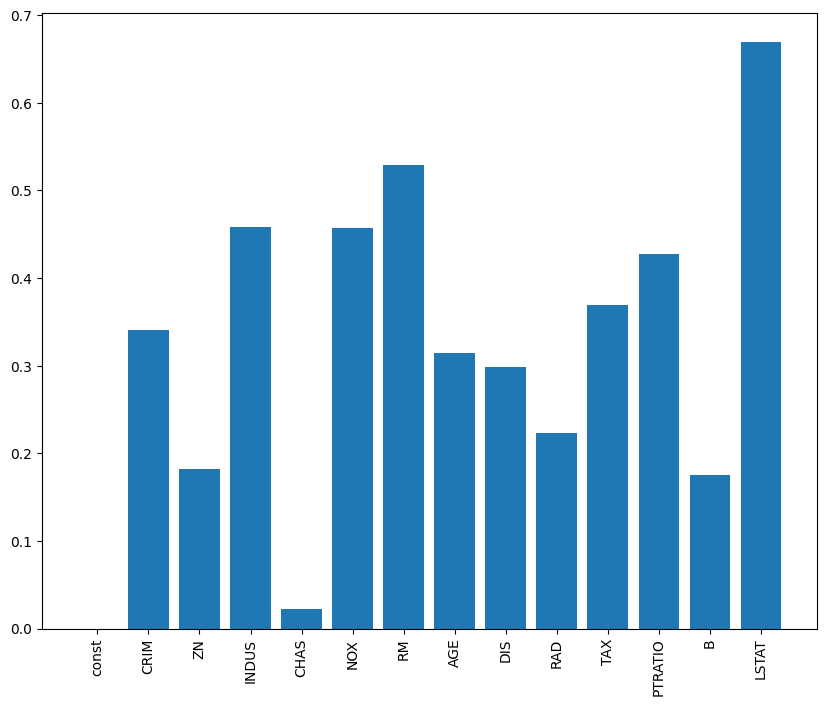

In [13]:
for i, score in zip(X.columns, mutual_info):
    print(f'Feature: {i}, Score: {score:.5f}')

plt.figure(figsize=(10, 8))
plt.bar([x for x in X.columns], mutual_info)
plt.xticks(rotation=90)
plt.show()

In [14]:
X.columns[mutual_info > 0.05]

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Задание 5: Используйте метод Recursive Feature Elimination на том же датасете.
   Постройте модель, например, линейную регрессию или SVM, и используйте RFE для выбора лучшего подмножества признаков.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)

rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]

X.columns[rfe.support_]

Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')

## Задание 6: Сравните различные методы отбора признаков. 
Примените каждый из методов отбора признаков к одному и тому же датасету, а затем сравните производительность моделей машинного обучения, обученных на этих различных подмножествах признаков.

In [33]:
from sklearn.metrics import mean_squared_error

features_dict={'OLS features': ols_features,
          'mutual_info_regression features': mig_features,
          'RFE features': rfe_features}

for features in features_dict.keys():
    model.fit(X_train[features_dict[features]], y_train)
    predictions = model.predict(X_test[features_dict[features]])

    mse = mean_squared_error(y_test, predictions)
    print(f"MSE для {features}: {mse}")

MSE для OLS features: 24.088447893940337
MSE для mutual_info_regression features: 24.635394156373298
MSE для RFE features: 33.49662524091359


In [34]:
ols_features

Index(['const', 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [35]:
mig_features

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [36]:
rfe_features

Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')